<a href="https://colab.research.google.com/github/snehith1438/2311cs020629/blob/main/ad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name
                 )

Saving Cars.csv to Cars.csv


In [3]:
df.shape

(81, 5)

In [5]:
df.head() # Change 'cars' to 'df' since 'df' is the variable holding your dataframemb

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [7]:
import pandas as pd
import statsmodels.formula.api as smf

# Instead of trying to read 'cars_data.csv', use the 'file_name' variable
# which contains the name of the file you uploaded.
cars = pd.read_csv(file_name)  # Load your car data into a DataFrame called 'cars'

# Now you can use 'cars' in your model:
model = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

In [9]:
rsq_hp = smf.ols('HP~WT+VOL+SP' ,data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_wt = smf.ols('WT~HP+VOL+SP' ,data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)
rsq_vol = smf.ols('VOL~WT+SP+HP' ,data=df).fit().rsquared
vif_vol = 1/(1-rsq_vol)
rsq_sp = smf.ols('SP~WT+VOL+HP' ,data=df).fit().rsquared
vif_sp = 1/(1-rsq_sp)
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [11]:
df1=df.drop(df.index[[70,76]],axis=0).reset_index

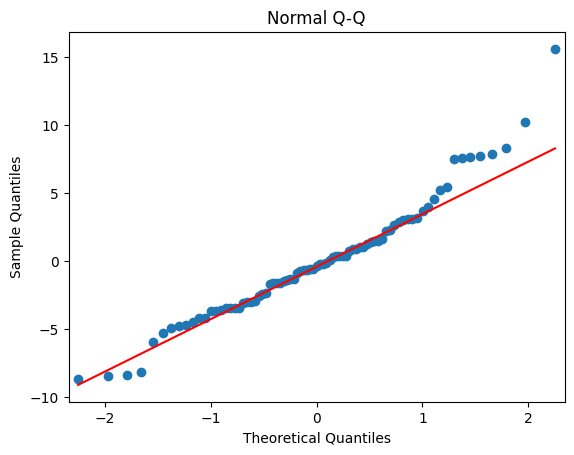

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q')
plt.show()

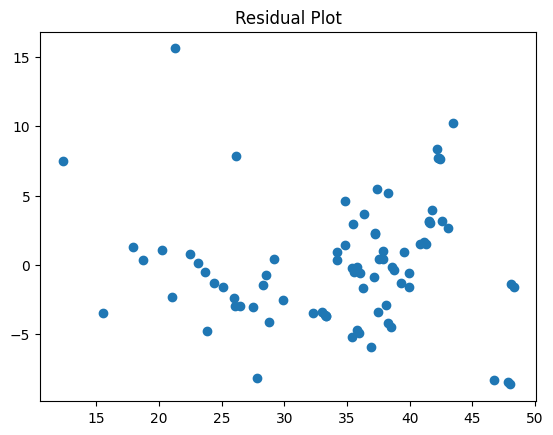

In [13]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.show()

In [14]:
import numpy as np
list(np.where(model.resid>10))

[array([ 0, 76])]

In [15]:
def get_standardized_values(values):
    return (values - values.mean()) / values.std()

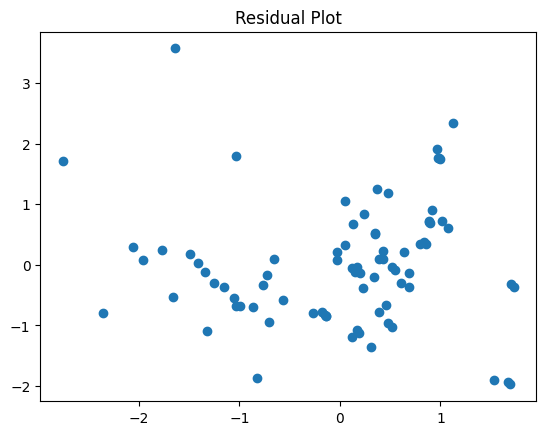

In [16]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.show()

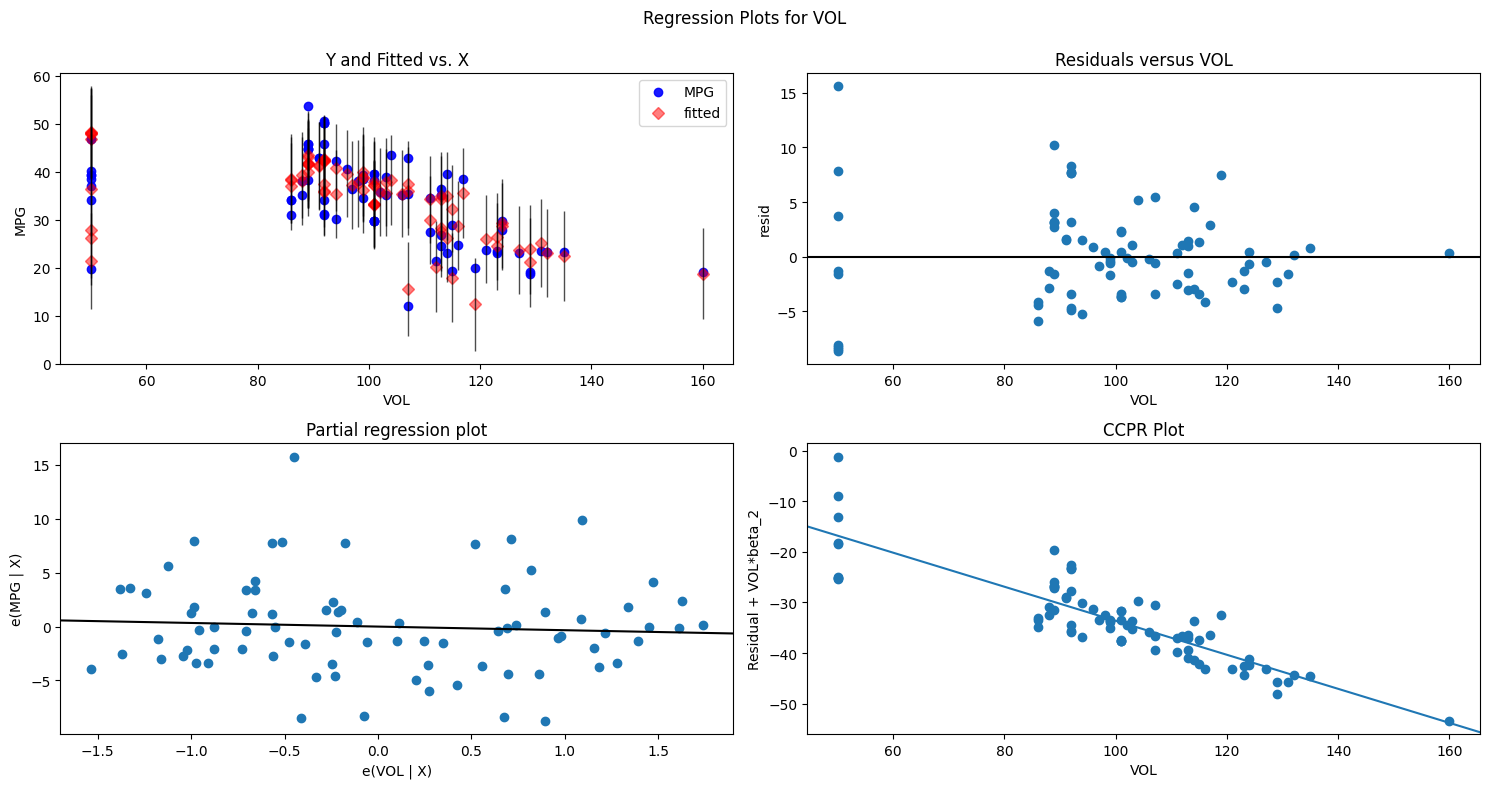

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

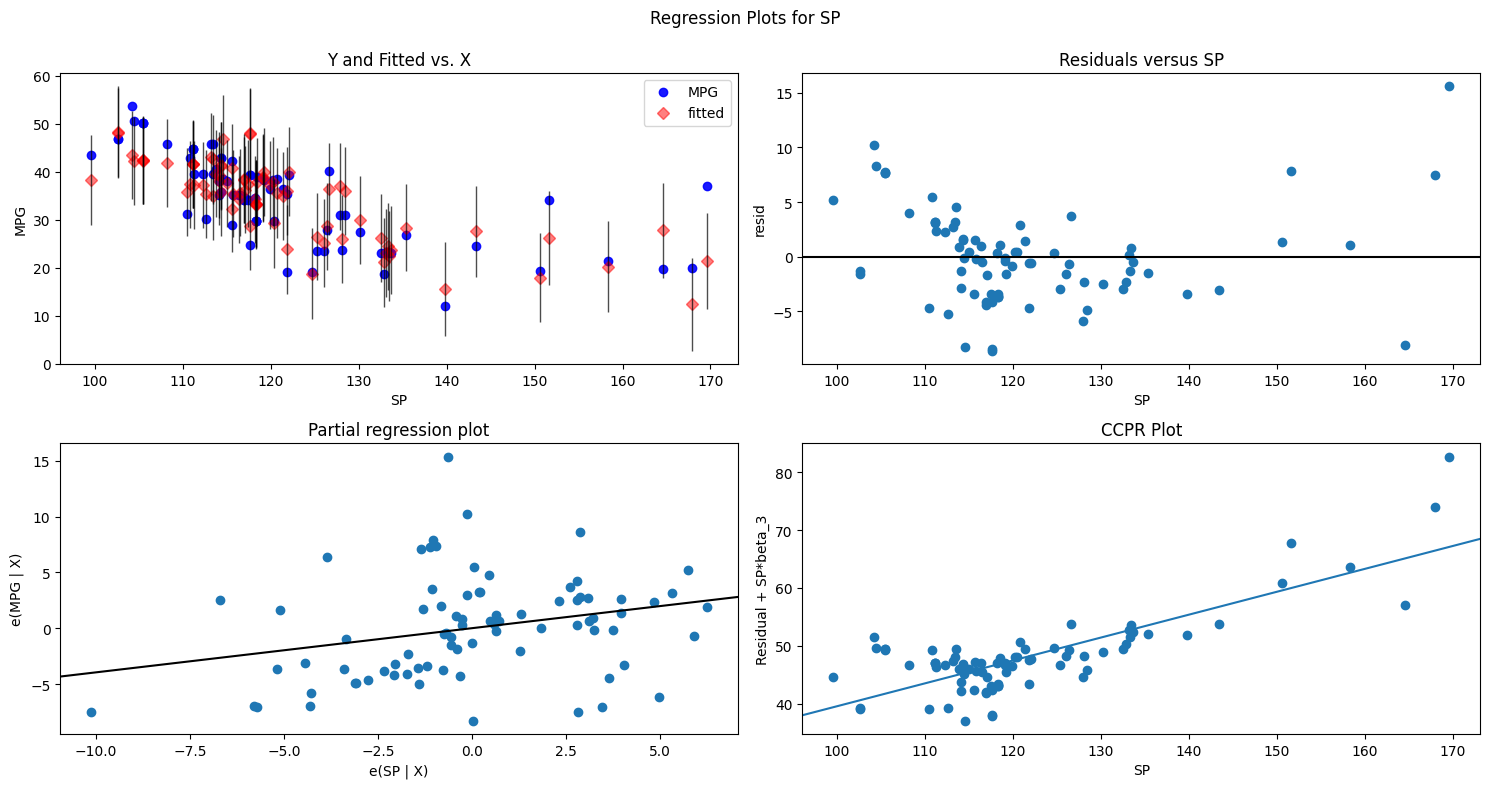

In [18]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

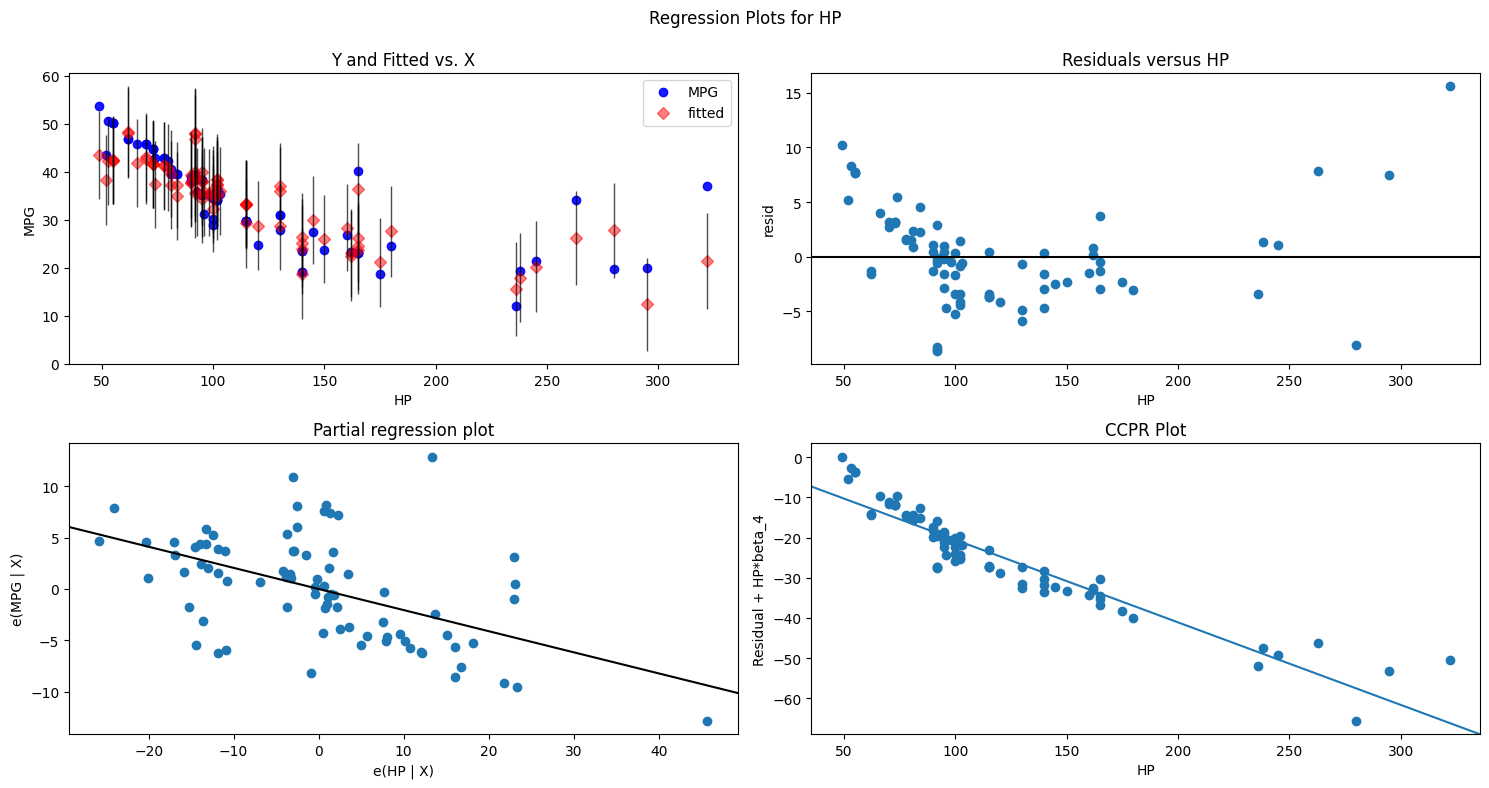

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

In [20]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

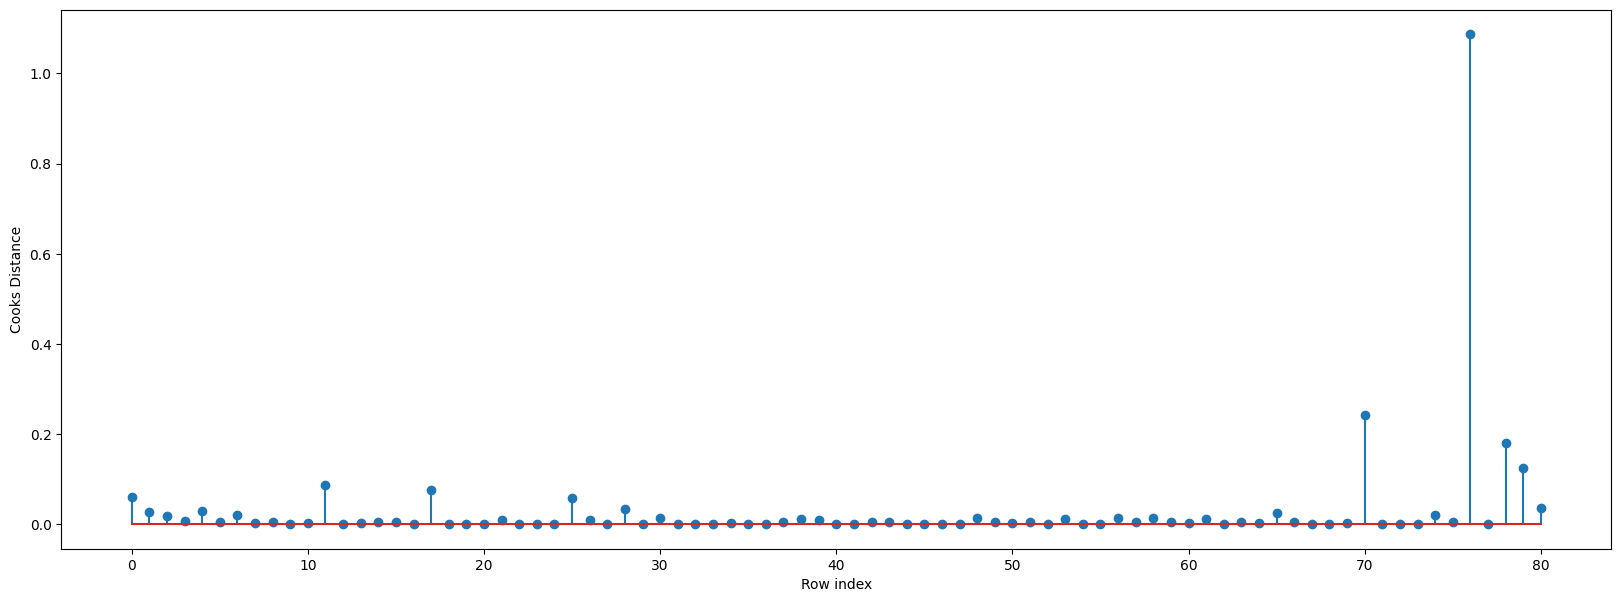

In [21]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [22]:
np.argmax(c) , np.max(c)

(76, 1.0865193998179699)

In [23]:
df[df.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [24]:
df1 = df.drop(df.index[[70,76]],axis=0).reset_index()

In [25]:
df1=df1.drop(['index'],axis=1)

In [26]:
(np.argmax(c),np.max(c))

(76, 1.0865193998179699)

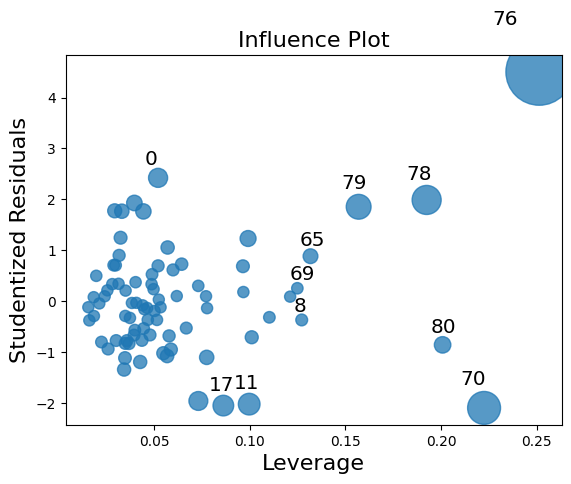

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model,alhpa=0.5)
plt.show()

In [28]:
final_model=smf.ols('MPG~WT+VOL+SP',data=df1).fit()

In [29]:
new_data=pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=[1])

In [32]:
final_model.predict(df1.iloc[0:5]) # Change 'final_ml_V' to 'final_model'

,0
0,43.334495
1,43.165903
2,42.803499
3,39.745907
4,42.854600


In [34]:
pred_y = final_model.predict(df1) # Change 'final_ml_V' to 'final_model'

In [35]:
pred_y

,0
0,43.334495
1,43.165903
2,42.803499
3,39.745907
4,42.854600
...,...
74,24.221492
75,18.354567
76,28.574508
77,9.977664
